In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import config

In [2]:
# Test paths from config.TEST_DIR so evaluation works from any cwd. Label mapping uses
# config.CLASS_NAMES (not test_set.class_names) so index→label matches training; avoids class-order drift.
test_set = tf.keras.utils.image_dataset_from_directory(
    str(config.TEST_DIR),
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=config.IMG_SIZE,
    shuffle=False,
    interpolation="bilinear"
)
class_name = list(config.CLASS_NAMES)  # same order as training; do not use test_set.class_names
print(f"Loaded {len(class_name)} classes from {config.TEST_DIR}")
print(class_name[:5], "...")

Found 3513 files belonging to 38 classes.
Loaded 38 classes from /Users/suhaasnv/Documents/Desktop ALT/portfolioprojects/Plant-leaf-disease-detection/data/test
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy'] ...


2026-01-29 14:27:52.505710: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2026-01-29 14:27:52.505734: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2026-01-29 14:27:52.505737: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.92 GB
I0000 00:00:1769668072.505749 3241228 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1769668072.505765 3241228 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
# Load model from project root so notebook works from any cwd
model_path = config.PROJECT_ROOT / "trained_plant_disease_model.h5"
cnn = tf.keras.models.load_model(str(model_path))

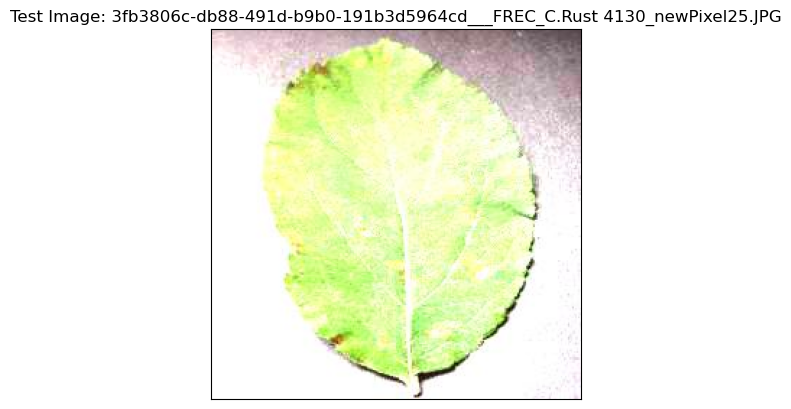

Loaded: /Users/suhaasnv/Documents/Desktop ALT/portfolioprojects/Plant-leaf-disease-detection/data/test/Apple___Cedar_apple_rust/3fb3806c-db88-491d-b9b0-191b3d5964cd___FREC_C.Rust 4130_newPixel25.JPG


In [4]:
import cv2
from pathlib import Path

# Use a sample image from data/test so the notebook works without an extra "images" folder.
# Picks first image from Apple___Cedar_apple_rust; override image_path to use your own file.
sample_dir = config.TEST_DIR / "Apple___Cedar_apple_rust"
sample_images = list(sample_dir.glob("*.JPG")) or list(sample_dir.glob("*.jpg"))
image_path = str(sample_images[0]) if sample_images else None

if image_path is None:
    print(f"No images found in {sample_dir}. Add test images to data/test/<class_name>/ or set image_path to your image.")
else:
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to load image at '{image_path}'")
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f"Test Image: {Path(image_path).name}")
        plt.xticks([])
        plt.yticks([])
        plt.show()
        print(f"Loaded: {image_path}")


In [5]:
# Run prediction only if we have a valid image_path (from previous cell)
if 'image_path' not in dir() or image_path is None:
    print("Run the previous cell first to load a sample image from data/test.")
else:
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=config.IMG_SIZE)
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr], dtype=np.float32) / 255.0  # normalize to [0,1] to match canonical pipeline
    predictions = cnn.predict(input_arr, verbose=0)
    result_index = int(np.argmax(predictions))
    print("Predicted class index:", result_index)
    print("Predicted class:", class_name[result_index])



Predicted class index: 8
Predicted class: Corn_(maize)___Common_rust_


2026-01-29 14:27:53.107281: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


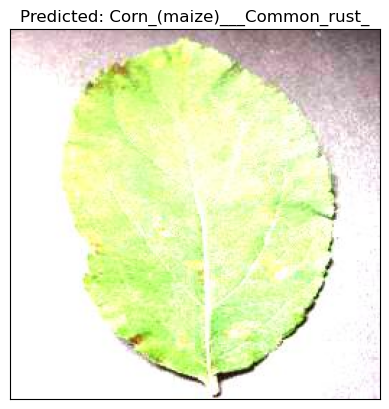

In [6]:
# Display the image with predicted label (run previous cells first so img and result_index exist)
if 'img' in dir() and 'result_index' in dir() and 0 <= result_index < len(class_name):
    model_prediction = class_name[result_index]
    plt.imshow(img)
    plt.title(f"Predicted: {model_prediction}")
    plt.xticks([])
    plt.yticks([])
    plt.show()
else:
    print("Run the previous cells to get img and result_index.")